In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import seaborn as sns

In [2]:
%matplotlib notebook
%matplotlib inline

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Import the dataset -  Udemy Courses
rawcoursedata = pd.read_csv('../../dataset/Course_info.csv')
rawcoursedata.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231,3.75,134,42,37,1268,2010-08-05T22:06:13Z,11/6/2020,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474,4.50,709,112,9,88,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713,4.40,41,13,14,82,2010-10-13T18:07:17Z,10/9/2019,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988,4.80,395,88,36,1511,2011-06-20T20:08:38Z,1/13/2016,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266,4.75,38,12,38,569,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [5]:
# Create a copy of the Dataset
coursedata_clean = rawcoursedata.copy()

# Remove non-usable columns
coursedata_clean.drop(['course_url', 'instructor_url','id'],axis=1,inplace=True)

# Convert all Variable Names to UPPERCASE
coursedata_clean.columns = coursedata_clean.columns.str.upper()

# Print the Variable Information to check
coursedata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TITLE               209734 non-null  object 
 1   IS_PAID             209734 non-null  bool   
 2   PRICE               209734 non-null  float64
 3   HEADLINE            209707 non-null  object 
 4   NUM_SUBSCRIBERS     209734 non-null  int64  
 5   AVG_RATING          209734 non-null  float64
 6   NUM_REVIEWS         209734 non-null  int64  
 7   NUM_COMMENTS        209734 non-null  int64  
 8   NUM_LECTURES        209734 non-null  int64  
 9   CONTENT_LENGTH_MIN  209734 non-null  int64  
 10  PUBLISHED_TIME      209734 non-null  object 
 11  LAST_UPDATE_DATE    209597 non-null  object 
 12  CATEGORY            209734 non-null  object 
 13  SUBCATEGORY         209734 non-null  object 
 14  TOPIC               208776 non-null  object 
 15  LANGUAGE            209734 non-nul

In [6]:
coursedata_clean.isnull().sum()

TITLE                   0
IS_PAID                 0
PRICE                   0
HEADLINE               27
NUM_SUBSCRIBERS         0
AVG_RATING              0
NUM_REVIEWS             0
NUM_COMMENTS            0
NUM_LECTURES            0
CONTENT_LENGTH_MIN      0
PUBLISHED_TIME          0
LAST_UPDATE_DATE      137
CATEGORY                0
SUBCATEGORY             0
TOPIC                 958
LANGUAGE                0
INSTRUCTOR_NAME         5
dtype: int64

In [7]:
#replace null topic with Unknown
coursedata_clean.TOPIC.fillna('Unknown', inplace = True)

#replace null headline with Unknown
coursedata_clean.HEADLINE.fillna('Unknown', inplace = True)

#replace null instructorname with Unknown
coursedata_clean.INSTRUCTOR_NAME.fillna('Unknown', inplace = True)

#exclude time from PUBLISHED_TIME 
coursedata_clean['PUBLISHED_TIME'] = pd.to_datetime(coursedata_clean['PUBLISHED_TIME']).dt.date

In [8]:
coursedata_clean.isnull().sum()

TITLE                   0
IS_PAID                 0
PRICE                   0
HEADLINE                0
NUM_SUBSCRIBERS         0
AVG_RATING              0
NUM_REVIEWS             0
NUM_COMMENTS            0
NUM_LECTURES            0
CONTENT_LENGTH_MIN      0
PUBLISHED_TIME          0
LAST_UPDATE_DATE      137
CATEGORY                0
SUBCATEGORY             0
TOPIC                   0
LANGUAGE                0
INSTRUCTOR_NAME         0
dtype: int64

In [9]:
coursedata_clean.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
209729    False
209730    False
209731    False
209732    False
209733    False
Length: 209734, dtype: bool

In [10]:
coursedata_clean[coursedata_clean.duplicated()]

,TITLE,IS_PAID,PRICE,HEADLINE,NUM_SUBSCRIBERS,AVG_RATING,NUM_REVIEWS,NUM_COMMENTS,NUM_LECTURES,CONTENT_LENGTH_MIN,PUBLISHED_TIME,LAST_UPDATE_DATE,CATEGORY,SUBCATEGORY,TOPIC,LANGUAGE,INSTRUCTOR_NAME


In [11]:

coursedata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TITLE               209734 non-null  object 
 1   IS_PAID             209734 non-null  bool   
 2   PRICE               209734 non-null  float64
 3   HEADLINE            209734 non-null  object 
 4   NUM_SUBSCRIBERS     209734 non-null  int64  
 5   AVG_RATING          209734 non-null  float64
 6   NUM_REVIEWS         209734 non-null  int64  
 7   NUM_COMMENTS        209734 non-null  int64  
 8   NUM_LECTURES        209734 non-null  int64  
 9   CONTENT_LENGTH_MIN  209734 non-null  int64  
 10  PUBLISHED_TIME      209734 non-null  object 
 11  LAST_UPDATE_DATE    209597 non-null  object 
 12  CATEGORY            209734 non-null  object 
 13  SUBCATEGORY         209734 non-null  object 
 14  TOPIC               209734 non-null  object 
 15  LANGUAGE            209734 non-nul

/tmp/ipykernel_9732/4068624215.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(coursedata_clean.corr(),annot=True)


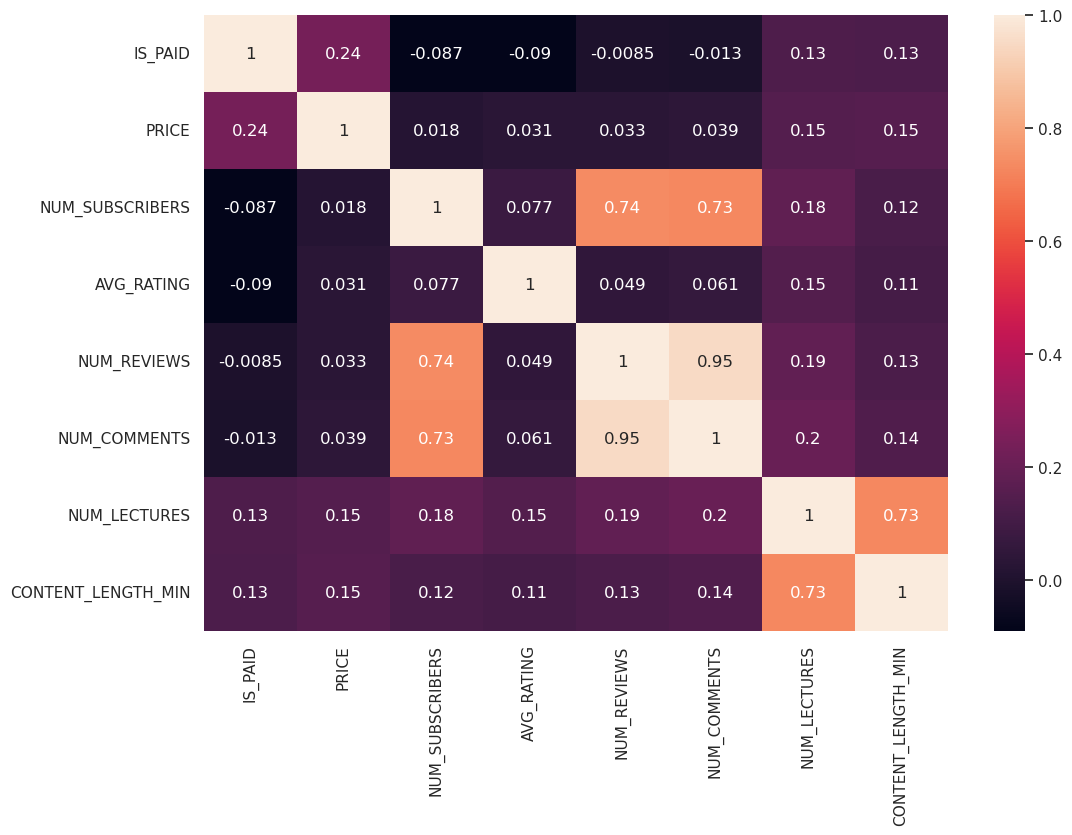

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(coursedata_clean.corr(),annot=True)
plt.xticks(rotation=90);

In [13]:
# Extract the float64 variables for simplicity
numeric_data = coursedata_clean.copy()
float_column = numeric_data[['PRICE','NUM_SUBSCRIBERS', 'AVG_RATING', 'NUM_REVIEWS', 'NUM_COMMENTS','NUM_LECTURES', 'CONTENT_LENGTH_MIN']].copy()

PRICE                 11404
NUM_SUBSCRIBERS       31288
AVG_RATING            29601
NUM_REVIEWS           30255
NUM_COMMENTS          28918
NUM_LECTURES          16890
CONTENT_LENGTH_MIN    19173
dtype: int64

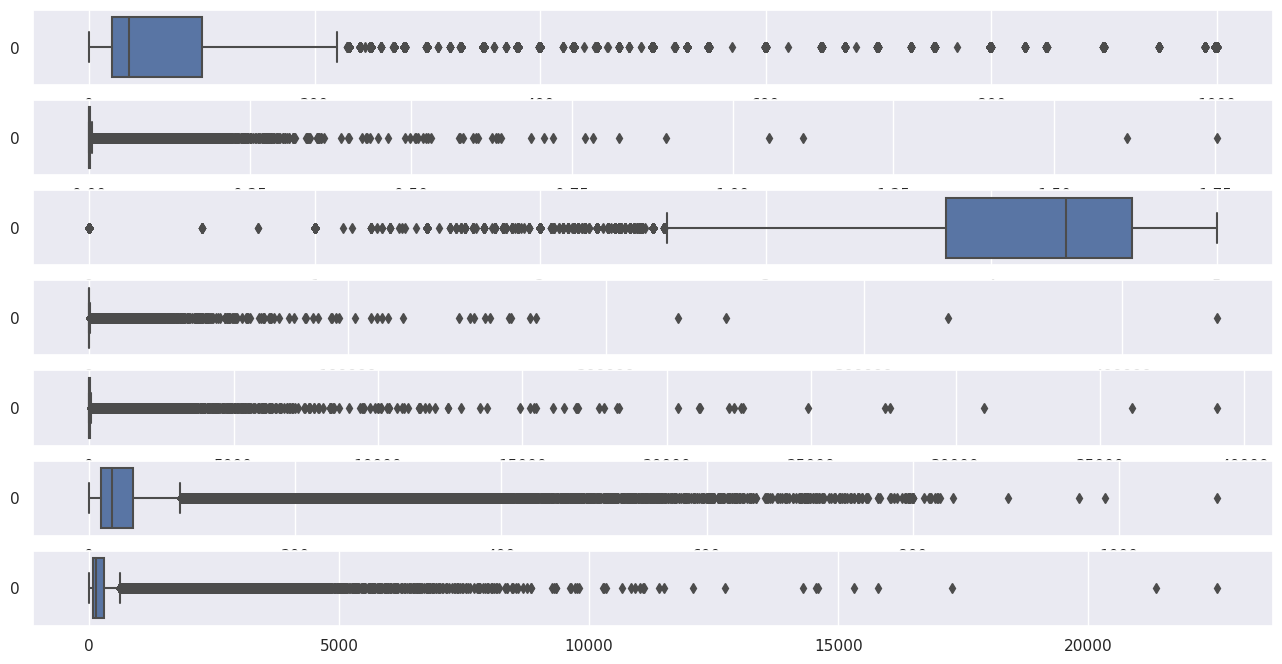

In [14]:
# Draw the boxplots
f, axes = plt.subplots(7, 1, figsize=(16, 8))

sb.boxplot(data = float_column["PRICE"], orient = "h", ax = axes[0])
sb.boxplot(data = float_column["NUM_SUBSCRIBERS"], orient = "h", ax = axes[1])
sb.boxplot(data = float_column["AVG_RATING"], orient = "h", ax = axes[2])
sb.boxplot(data = float_column["NUM_REVIEWS"], orient = "h", ax = axes[3])
sb.boxplot(data = float_column["NUM_COMMENTS"], orient = "h", ax = axes[4])
sb.boxplot(data = float_column["NUM_LECTURES"], orient = "h", ax = axes[5])
sb.boxplot(data = float_column["CONTENT_LENGTH_MIN"], orient = "h", ax = axes[6])

# Calculate the quartiles
Q1 = float_column.quantile(0.25)
Q3 = float_column.quantile(0.75)

# Rule to identify outliers
rule = ((float_column < (Q1 - 1.5 * (Q3 - Q1))) | (float_column > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

In [15]:
# Calculate the quartiles
Q1 = float_column.quantile(0.25)
Q3 = float_column.quantile(0.75)

# Rule to identify outliers
rule = ((float_column < (Q1 - 1.5 * (Q3 - Q1))) | (float_column > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,PRICE,NUM_SUBSCRIBERS,AVG_RATING,NUM_REVIEWS,NUM_COMMENTS,NUM_LECTURES,CONTENT_LENGTH_MIN
0,False,False,False,False,False,False,True
1,False,True,False,True,True,False,False
2,False,False,False,False,False,False,False
3,False,True,False,True,True,False,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
209729,False,False,True,False,False,False,False
209730,False,False,True,False,False,False,False
209731,False,False,True,False,False,False,False
209732,False,False,True,False,False,False,False


In [16]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers
outliers

0          True
1          True
2         False
3          True
4         False
          ...  
209729     True
209730     True
209731     True
209732     True
209733     True
Length: 209734, dtype: bool

In [17]:
# Total number of outliers for the two variables
outliers.value_counts()

False    114994
True      94740
dtype: int64

In [18]:
# Find the row indices correspond to outliers in the dataframe
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([     0,      1,      3,      5,      6,      7,      8,      9,
                11,     13,
            ...
            209722, 209724, 209726, 209727, 209728, 209729, 209730, 209731,
            209732, 209733],
           dtype='int64', length=94740)

In [19]:
# Remove the outliers based on the row indices obtained above
float_column.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
float_column

,PRICE,NUM_SUBSCRIBERS,AVG_RATING,NUM_REVIEWS,NUM_COMMENTS,NUM_LECTURES,CONTENT_LENGTH_MIN
2,19.99,1713,4.40,41,13,14,82
4,159.99,1266,4.75,38,12,38,569
10,49.99,794,4.10,27,16,10,236
12,49.99,2058,3.65,25,8,81,459
16,29.99,505,3.25,24,3,19,148
...,...,...,...,...,...,...,...
209706,24.99,14,5.00,5,6,11,68
209711,34.99,206,4.65,10,1,56,275
209719,84.99,2009,4.21,9,4,37,397
209723,19.99,321,5.00,8,7,10,44


In [20]:
category_data= coursedata_clean.copy()
paid_cat = category_data[["IS_PAID","CATEGORY","SUBCATEGORY"]]

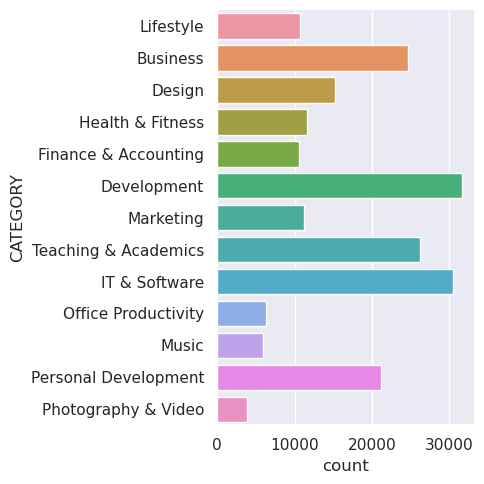

In [21]:
sb.catplot(y = 'CATEGORY', data = paid_cat, kind = "count")

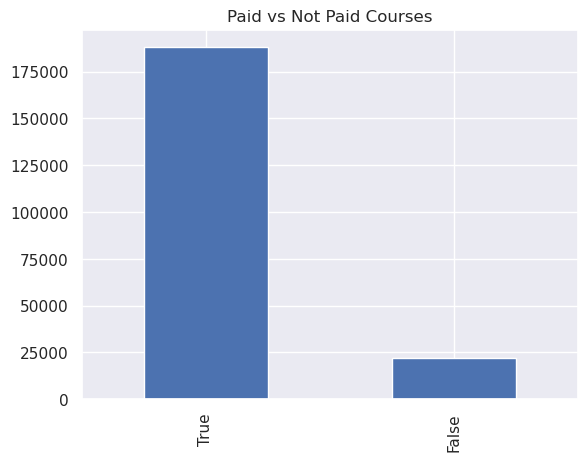

In [22]:
paid_cat['IS_PAID'].value_counts().plot(kind='bar')
plt.title('Paid vs Not Paid Courses');

<AxesSubplot: xlabel='PRICE', ylabel='NUM_SUBSCRIBERS'>

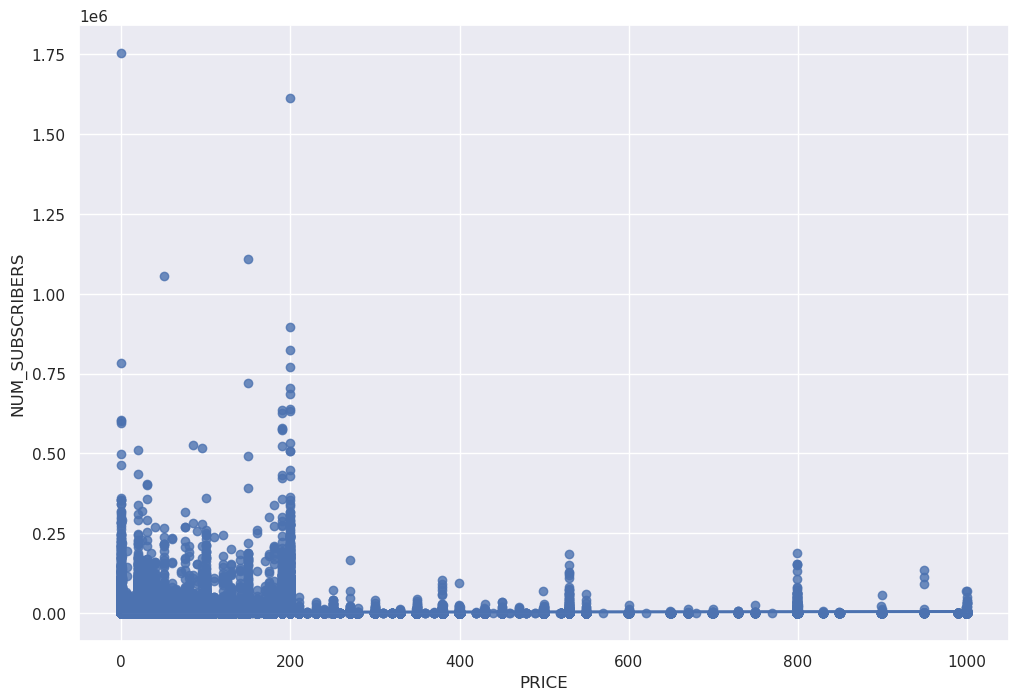

In [23]:
plt.figure(figsize=(12,8))
sns.regplot(x='PRICE',y='NUM_SUBSCRIBERS', data=coursedata_clean)

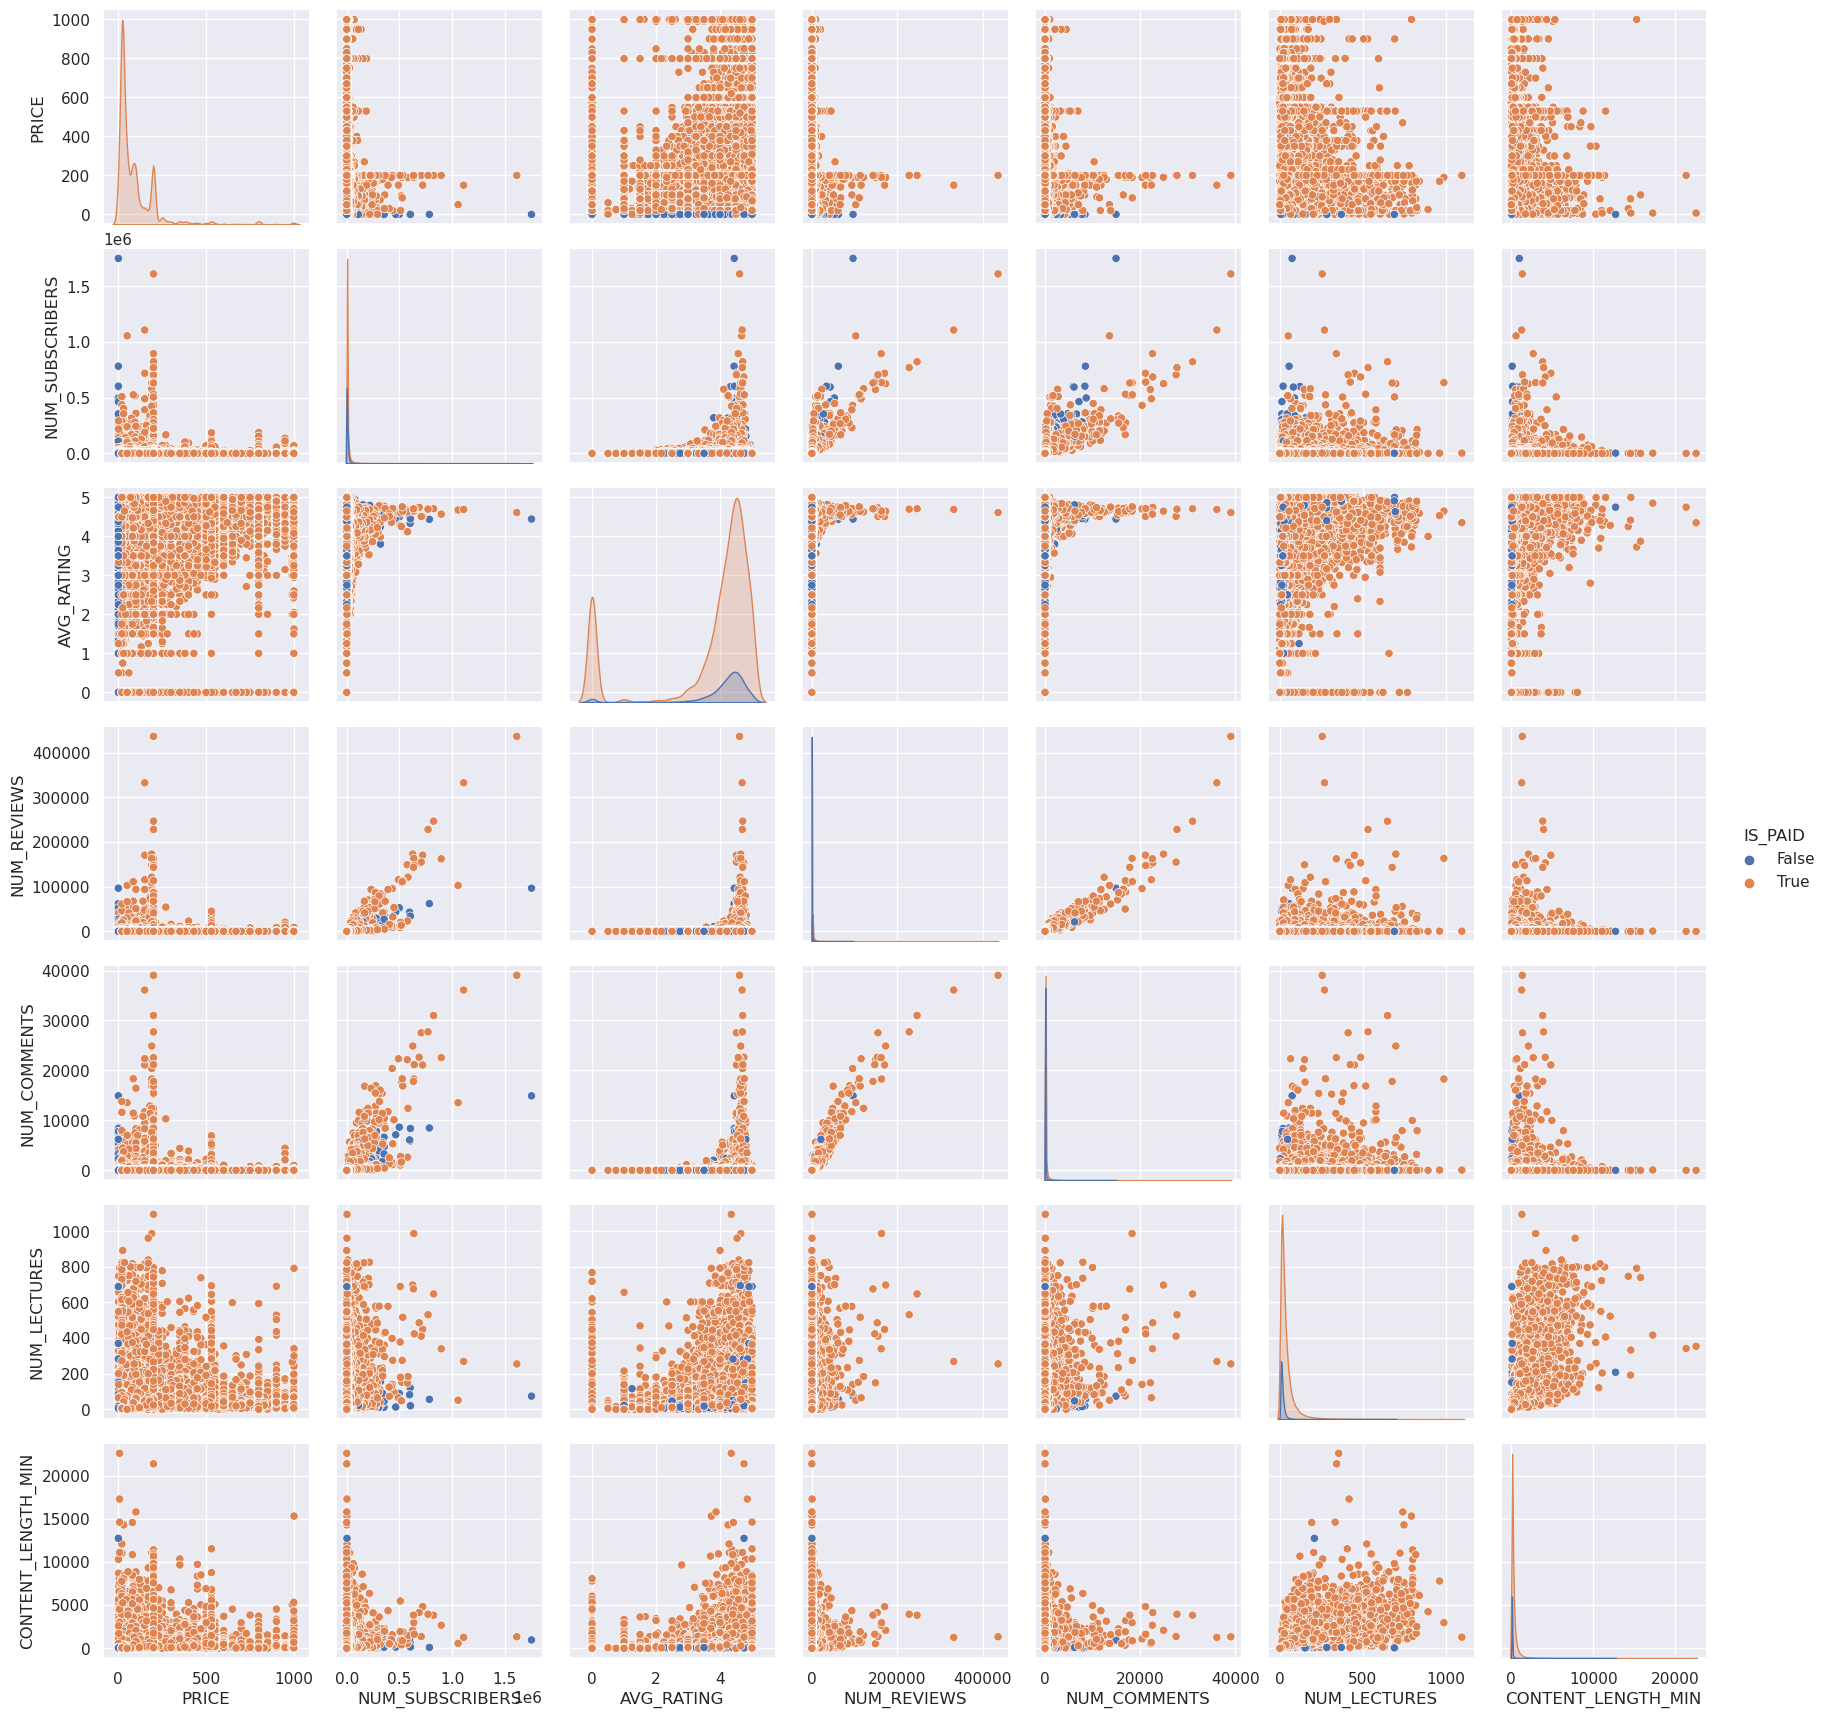

In [24]:
sns.pairplot(coursedata_clean, hue="IS_PAID")

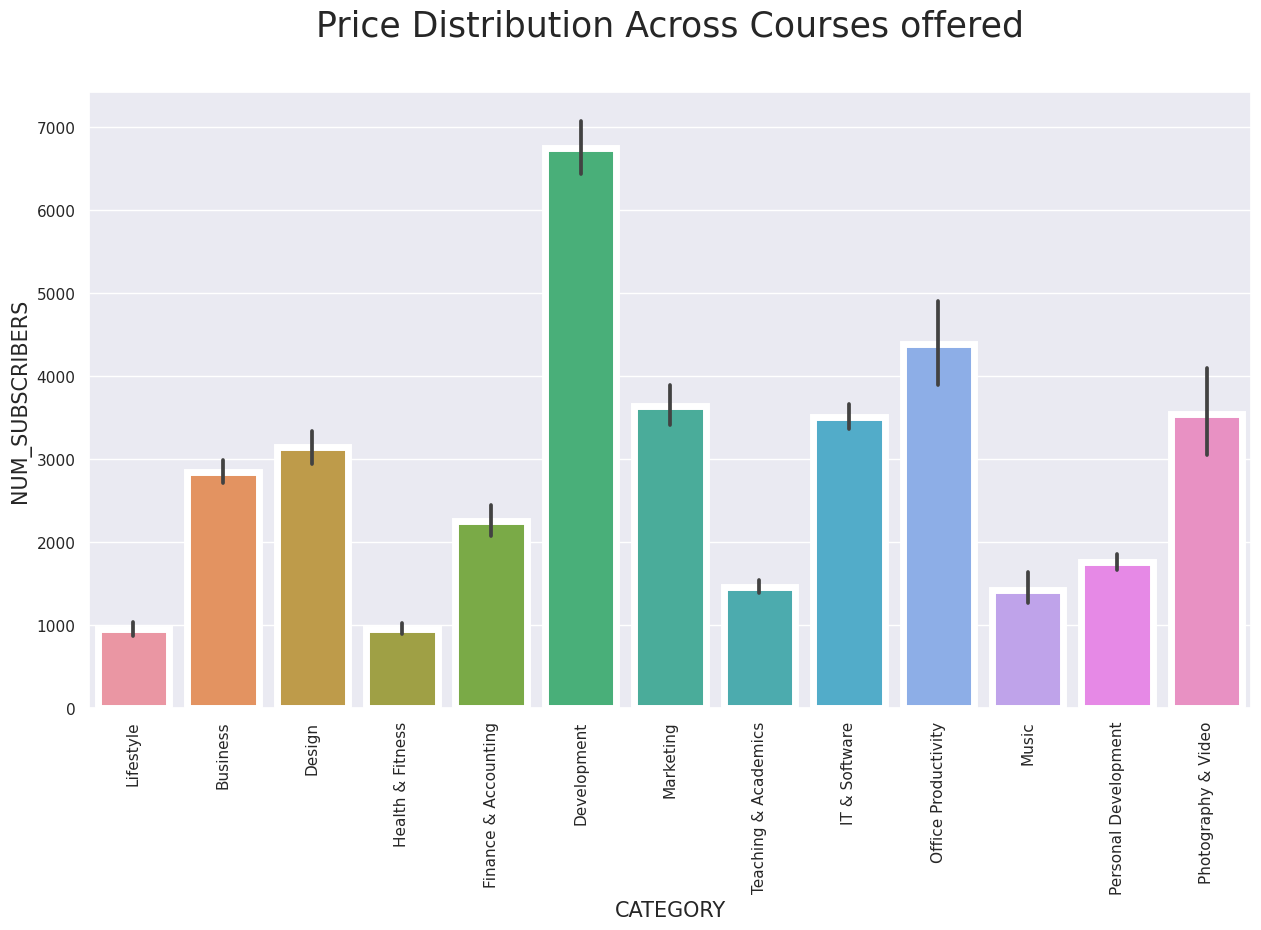

In [25]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "CATEGORY", 
                 y = "NUM_SUBSCRIBERS", 
                 data=coursedata_clean, 
                linewidth=5
                )

plt.title("Price Distribution Across Courses offered", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("NUM_SUBSCRIBERS", fontsize = 15, )
plt.xlabel("CATEGORY",fontsize = 15);
plt.xticks(rotation=90);

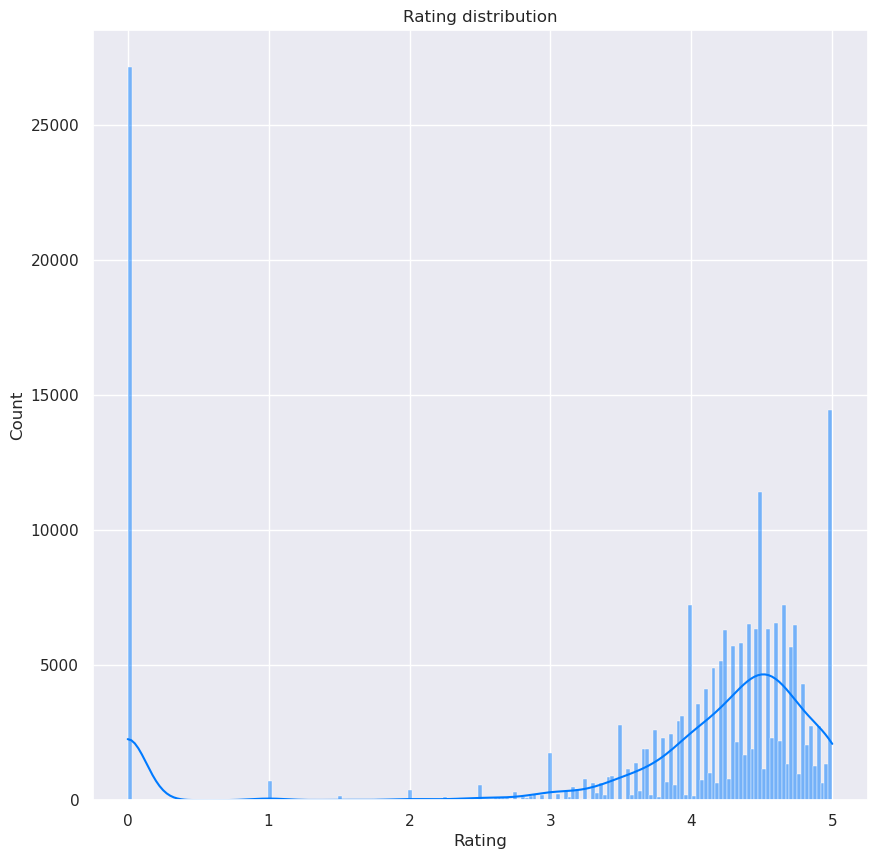

In [26]:
# Plot the rating distribution
f, ax = plt.subplots(figsize=(10, 10))
sns.histplot(coursedata_clean['AVG_RATING'],kde=True, color="#007aff");
ax.set(ylabel="Count")
ax.set(xlabel="Rating")
ax.set(title="Rating distribution")
plt.show()

<AxesSubplot: xlabel='TEST_RATING', ylabel='count'>

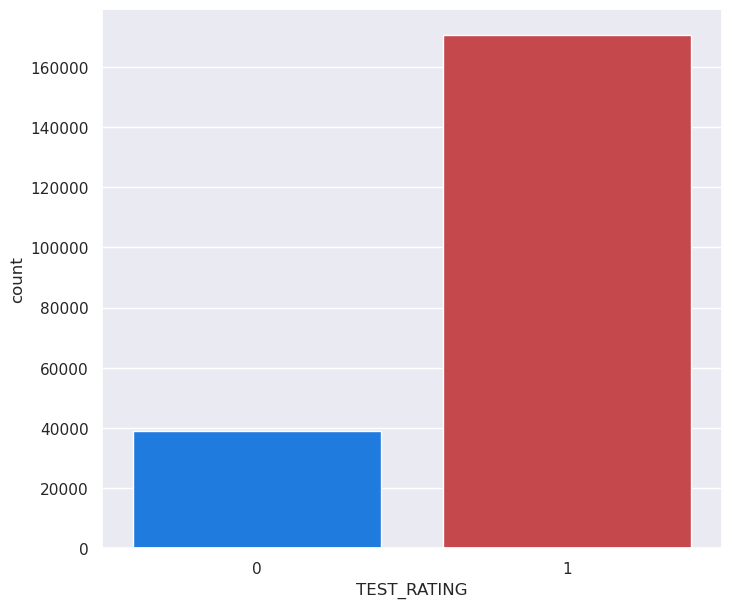

In [27]:
#Converting user_rating to 1 (rating >= 4) and 0 (rating < 4)
coursedata_clean['TEST_RATING'] = coursedata_clean['AVG_RATING'].apply(lambda x : 1 if x >= 3.5 else 0)
rating_bv = coursedata_clean.groupby(['TEST_RATING']).size().sort_values(ascending=False).reset_index(name='Count')
plt.figure(figsize=(8, 7))
sns.countplot(x='TEST_RATING', data=coursedata_clean, palette=['#007aff', '#d93339'])

Text(0.5, 1.0, 'Top 10 Course Categories')

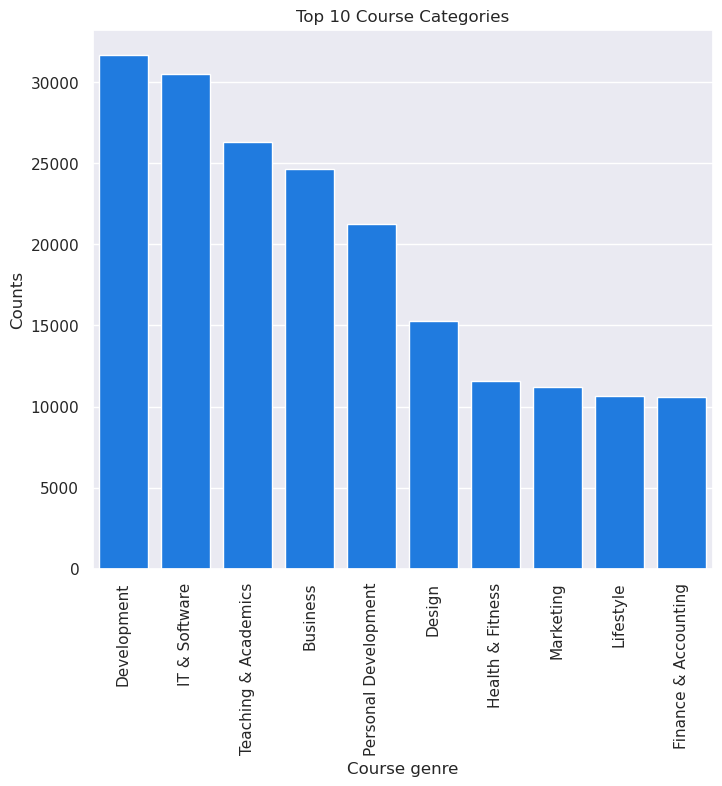

In [28]:
# Plot the genre count
categories = coursedata_clean.CATEGORY.value_counts()
plt.figure(figsize = (8, 7), facecolor = None)
plot1 = sns.barplot(x=categories[:10].index, y=categories[:10].values, color="#007aff")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="center")
plot1.set(xlabel='Course genre',ylabel='Counts')
plot1.set_title('Top 10 Course Categories')

Text(0.5, 1.0, 'COURSE GENRE vs AVG_RATING')

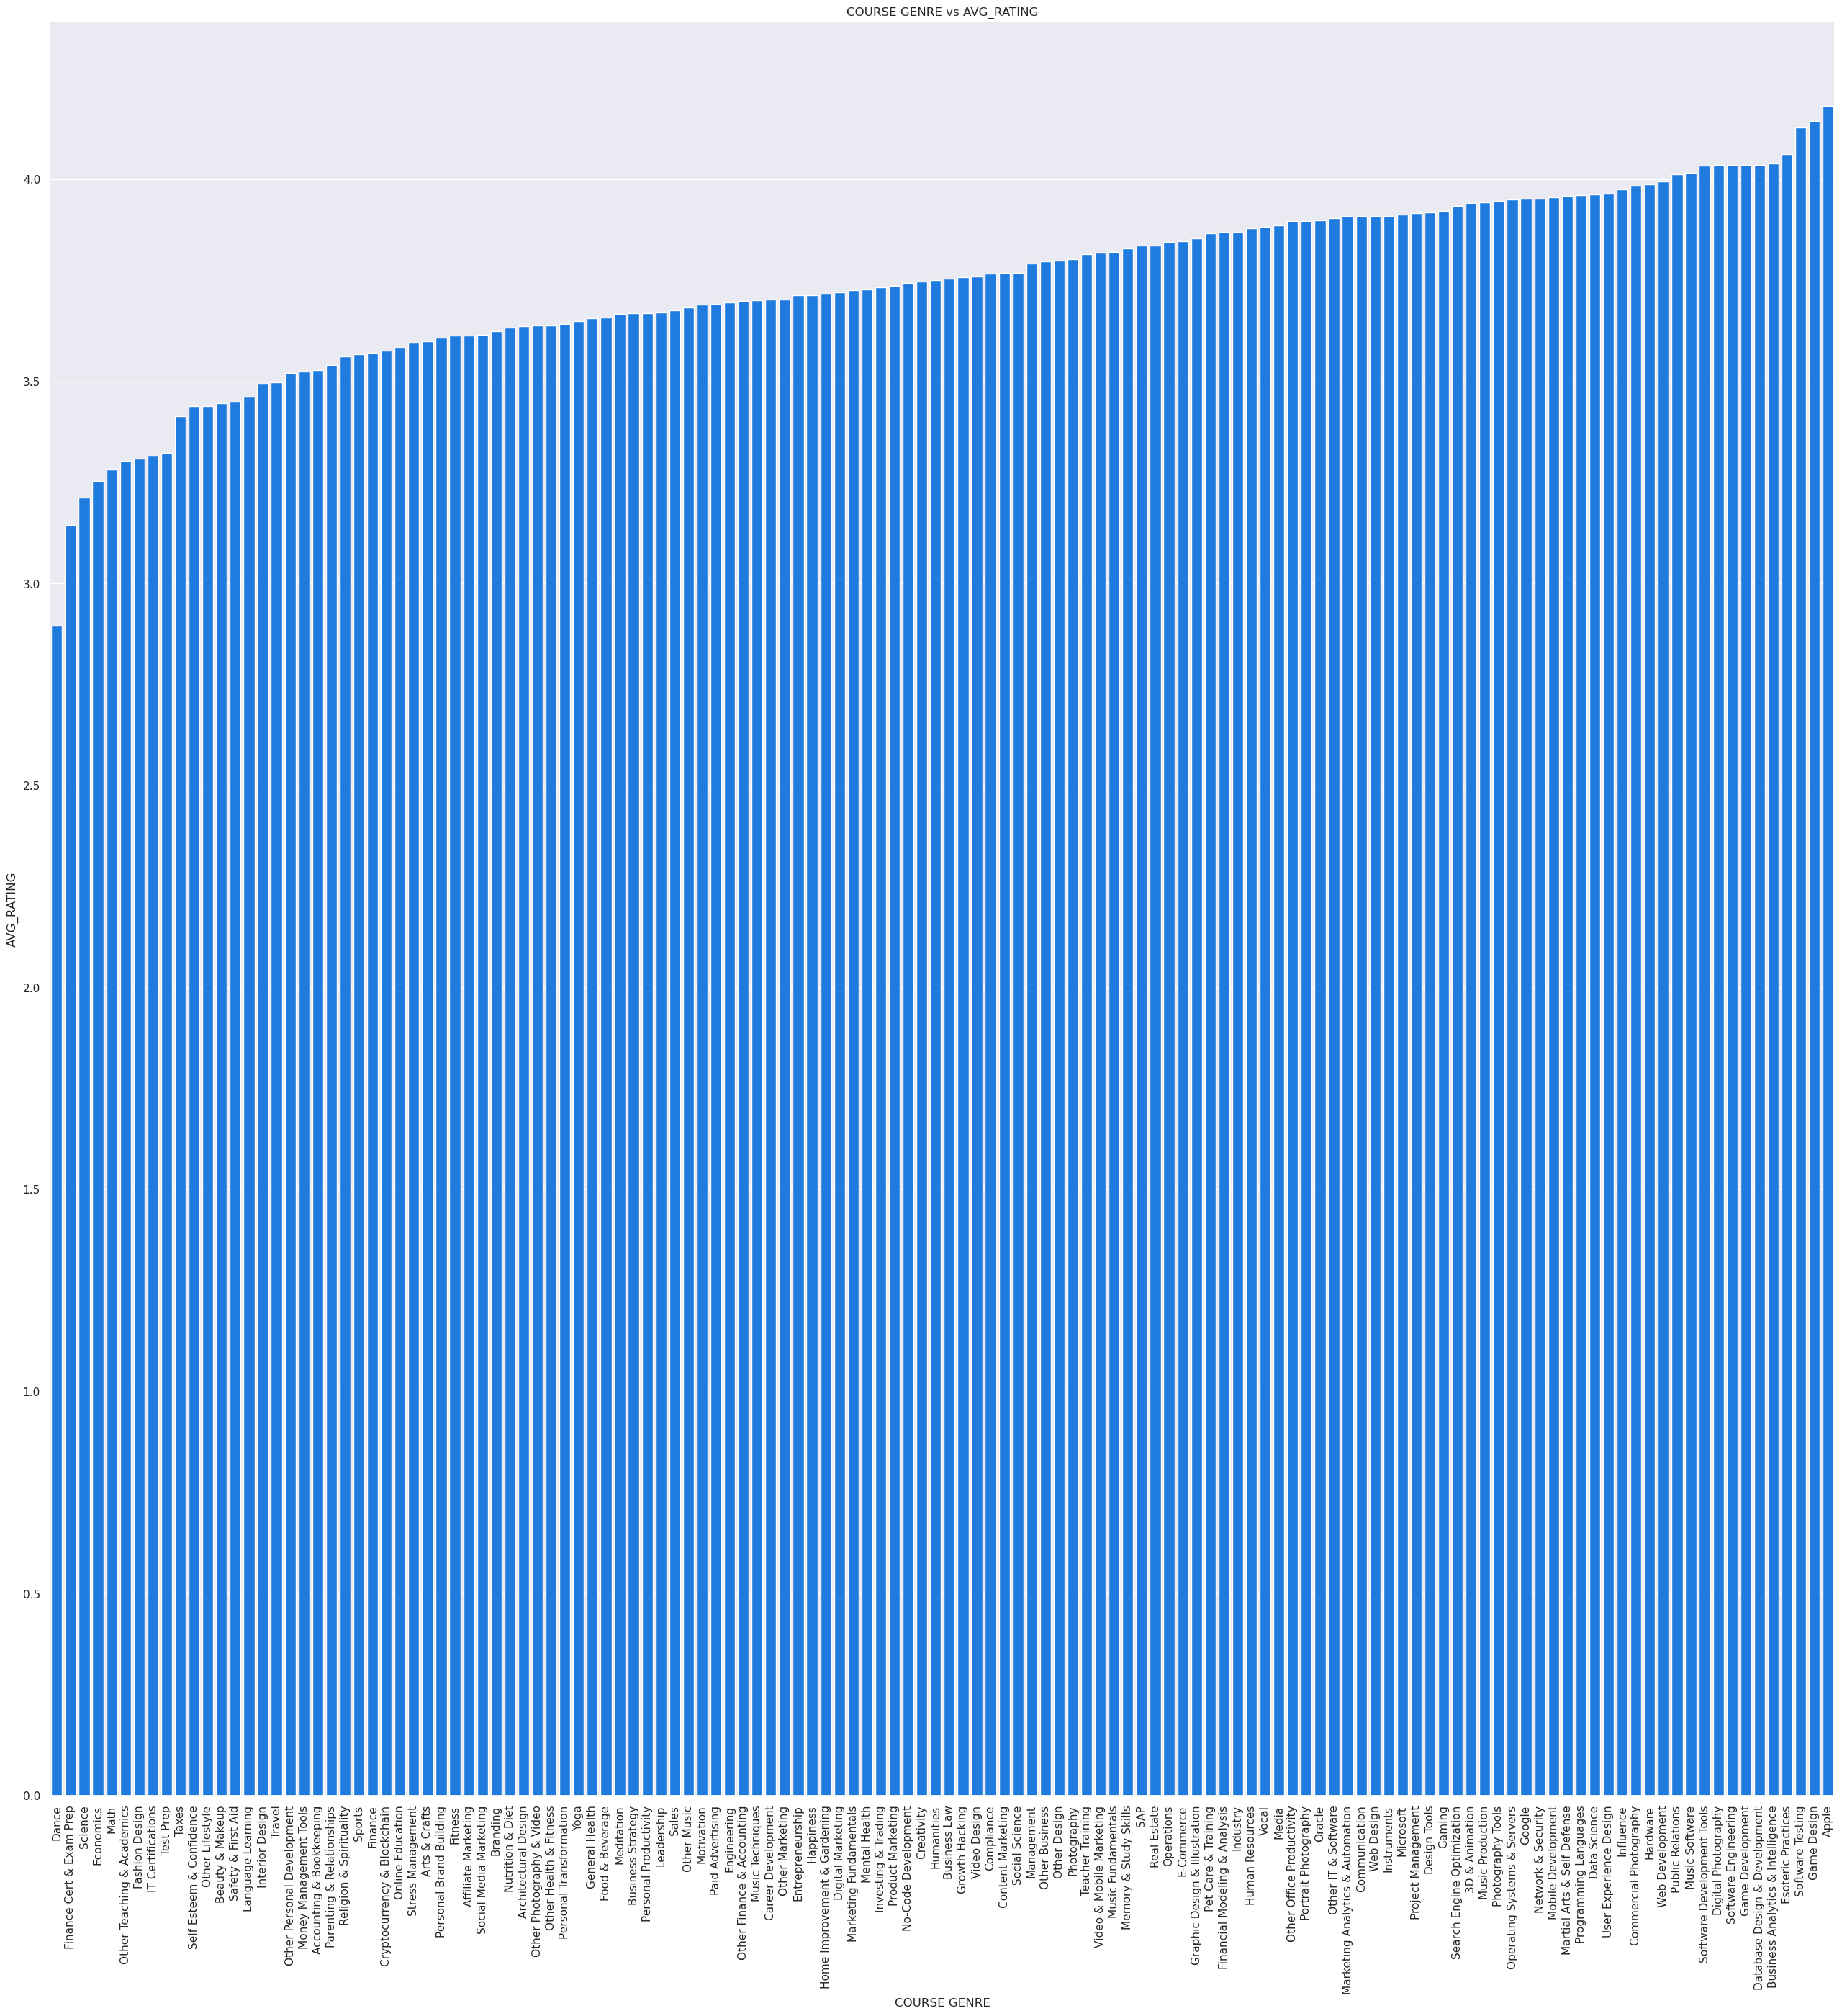

In [29]:
# Lets plot our user ratings against the genres
compare_ratings=coursedata_clean.groupby('SUBCATEGORY')['AVG_RATING'].mean().reset_index().sort_values(by=['AVG_RATING'])

plt.figure(figsize = (32, 32), facecolor = None)
plot1 = sns.barplot(x="SUBCATEGORY", y="AVG_RATING", data=compare_ratings, order=compare_ratings['SUBCATEGORY'], color="#007aff")

plot1.set_xticklabels(compare_ratings['SUBCATEGORY'], rotation=90, ha="center")
plot1.set(xlabel='COURSE GENRE',ylabel='AVG_RATING')
plot1.set_title('COURSE GENRE vs AVG_RATING')

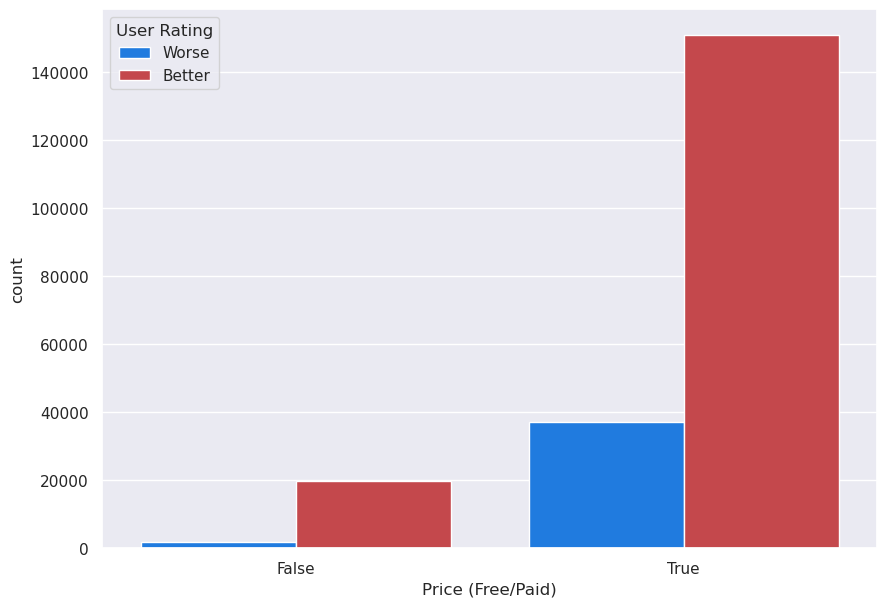

In [30]:
plt.figure(figsize=(10, 7))
test = sns.countplot(x="IS_PAID", hue="TEST_RATING", data=coursedata_clean, palette=['#007aff', '#d93339'])
test.set(xlabel='Price (Free/Paid)')
plt.legend(title='User Rating', loc='upper left', labels=['Worse', 'Better'])

In [31]:
rating_ratio = coursedata_clean.groupby(['IS_PAID', 'TEST_RATING']).size().reset_index(name='count')

In [32]:
rates = coursedata_clean.groupby(['TEST_RATING']).size().reset_index(name='count')
rates['count'][1] / (rates['count'][0] + rates['count'][1])  * 100
print('The ratio of ratings 0 (< 3.5) for all Courses is {}%'
     .format(round((rates['count'][1])/(rates['count'][0] + rates['count'][1])*100, 2)))
print('The ratio of ratings 0 (< 3.5) for all Courses is {}%'
     .format(round((rates['count'][0])/(rates['count'][0] + rates['count'][1])*100, 2)))

The ratio of ratings 0 (< 3.5) for all Courses is 81.41%
The ratio of ratings 0 (< 3.5) for all Courses is 18.59%


In [33]:
print('The ratio of ratings 0 (< 3.5) for free Course is {}%'
     .format(round((rating_ratio['count'][0])/((rating_ratio['count'][0]) + (rating_ratio['count'][1])) * 100, 2)))
print('The ratio of ratings 1 (> 3.5) for free Course is {}%'
     .format(round((rating_ratio['count'][1])/((rating_ratio['count'][0]) + (rating_ratio['count'][1])) * 100, 2)))

The ratio of ratings 0 (< 3.5) for free Course is 8.43%
The ratio of ratings 1 (> 3.5) for free Course is 91.57%


In [34]:
print('The ratio of ratings 0 (< 3.5) for paid Courses is {}%'
     .format(round((rating_ratio['count'][2])/((rating_ratio['count'][2]) + (rating_ratio['count'][3])) * 100, 2)))
print('The ratio of ratings 0 (< 3.5) for paid Courses is {}%'
     .format(round((rating_ratio['count'][3])/((rating_ratio['count'][2]) + (rating_ratio['count'][3])) * 100, 2)))

The ratio of ratings 0 (< 3.5) for paid Courses is 19.76%
The ratio of ratings 0 (< 3.5) for paid Courses is 80.24%


Text(0, 0.5, 'SUBSCRIBERS')

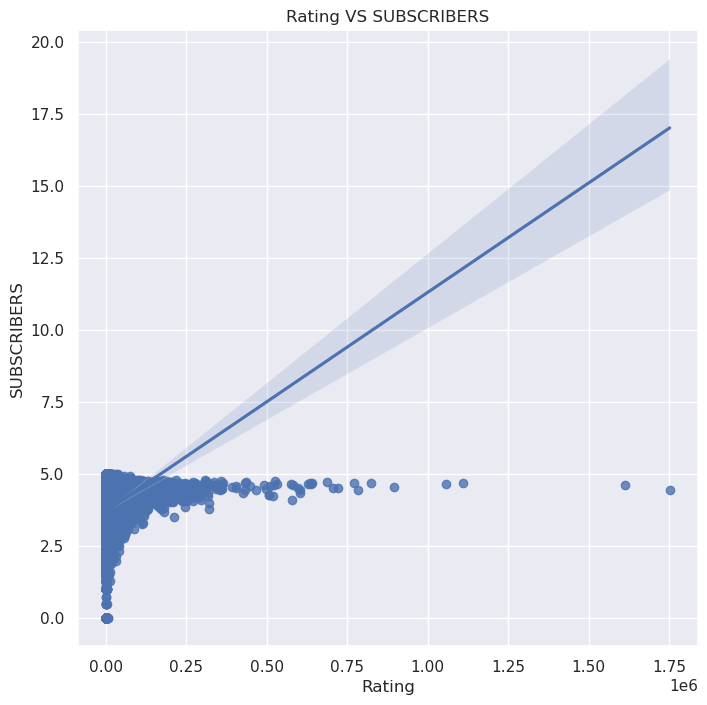

In [35]:
fig=plt.subplots(figsize=(8,8))
plot1 = sns.regplot(x='NUM_SUBSCRIBERS',y='AVG_RATING',data=coursedata_clean)
plot1.set_title('Rating VS SUBSCRIBERS')
plot1.set_xlabel('Rating')
plot1.set_ylabel('SUBSCRIBERS')

### SOMETHING WRONG

- #### chose some course to make good course

In [36]:
coursedata_clean['goodcourse'] = (coursedata_clean['AVG_RATING']>=3.5) & (coursedata_clean['IS_PAID']>0) & (coursedata_clean['SUBCATEGORY']
                        .isin(["Dance"]) == False) & (coursedata_clean[''] >= ) & (coursedata_clean[''] >= ) & (coursedata_clean[''] >= )    


SyntaxError: invalid syntax (902254104.py, line 2)